In [1]:
import math 
import random 
import cv2
from PIL import Image
import pickle
import imageio
import cv2
import kornia as K
import kornia.geometry as KG
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from numpy.linalg import inv

In [2]:
with open('10frame_test.pickle', 'rb') as f:
    rec = pickle.load(f)

EOFError: Ran out of input

In [ ]:

rec = np.load('data.npz', 'rb')
rec2 = np.load('data2.npz', 'rb')
#

In [ ]:
rgb_image1 = rec['rgb']
rgb_image2 = rec2['rgb']
depth_image1 = rec['depth']
depth_image2 = rec2['depth']
intrinsic = rec['K']

In [ ]:
depth_image1.shape

(600, 800)

In [50]:
point1,color1 = image_to_point(rgb_image1,intrinsic,depth_image1)

In [51]:
import open3d as o3d
pcd_o3d = o3d.geometry.PointCloud()  
pcd_o3d.points = o3d.utility.Vector3dVector(point.reshape(-1,3))
# pcd_o3d.points = o3d.utility.Vector3dVector(lidar.reshape(-1,3))
pcd_o3d.colors = o3d.utility.Vector3dVector(color)  
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

In [ ]:
point1,color1 = image_to_point(rgb_image1,intrinsic,depth_image1)
point_1_inverseE = inverse_E_point(point1,extrinsic1)
point_1_project = extrinsic2@np.concatenate([point_1_inverseE, np.ones((point_1_inverseE.shape[0], 1))], axis=1).T
point_1_project = point_1_project.T[:, :3]
point_1_inverseE_projected,color1_projected = point_to_image(point_1_project,intrinsic,height=im2.shape[0],width = im2.shape[1],color =color2)


In [129]:
# im1 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\002.png')
im1 = cv2.cvtColor(cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out_test\002.png'), cv2.COLOR_BGR2RGB)
# im2 = cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\010.png')
im2 = cv2.cvtColor(cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\010.png'), cv2.COLOR_BGR2RGB)
intrinsic = rec['intrinsic']
extrinsic1 = inv(np.array([[0,1,0,0],[0,0,-1,0],[1,0,0,0],[0,0,0,1]]))@rec['extrinsic'][1]
extrinsic2 = inv(np.array([[0,1,0,0],[0,0,-1,0],[1,0,0,0],[0,0,0,1]]))@rec['extrinsic'][9]
position1 = rec['position'][1]
position2 = rec['position'][9]
depth1 = rec['depth'][1]
depth2 = rec['depth'][9]
transfrom1 = rec['get_transfrom'][1]
transfrom2 = rec['get_transfrom'][9]

In [137]:
lidar = rec['lidar']

In [138]:
lidar.shape

AttributeError: 'list' object has no attribute 'shape'

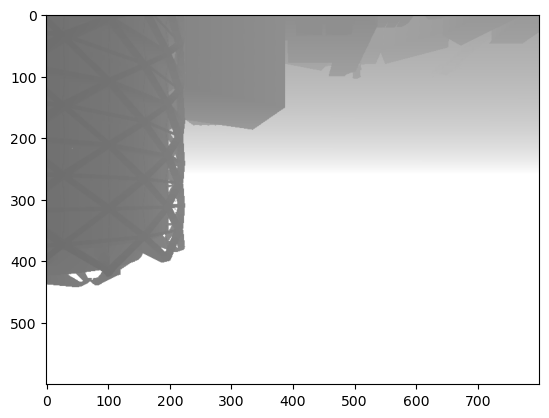

In [108]:
plt.imshow(depth1)

In [109]:
extrinsic1
rotation1 = extrinsic1[:3,:3]
translation1 = extrinsic1[:3,3]
extrinsic2
rotation2 = extrinsic2[:3,:3]

$x =  \frac{\phi_{x} u+ \gamma u}{w} + \delta_x$

$u = \frac{(x-\delta_x)w}{\phi_x+\gamma}$

In [110]:
depth1.shape

(600, 800, 4)

In [49]:
# 2d image to 3D point, inversed intrinsic matrix
def image_to_point(image, intrinsic, depth_image):
    height, width = depth_image.shape[:2]
    fx = intrinsic[0,0]
    fy = intrinsic[1,1]
    cx = intrinsic[0,2]
    cy = intrinsic[1,2]
    skew = intrinsic[0,1]

    point1 = []
    color1 = []
    height, width = depth_image.shape[:2]
    inv_intrinsic = inv(intrinsic)
    for i in range(height):
        for j in range(width):
            # R = depth_image[i,j,0]
            # G = depth_image[i,j,1]
            # B = depth_image[i,j,2]
            # z =  (R + G * 256 + B * 256 * 256)*1000.0 / ((256 * 256 * 256 - 1))

            # inv_intrinsic = inv(intrinsic)
            if depth_image[i,j] != 1.0:
                
                point = (depth_image[i,j]*1000* np.array([i,j,1])).reshape(3, 1)
                point = inv_intrinsic @ point  #np.dot(inv_intrinsic, point)
                point1.append(point)

                    # if 0 <= x < width and 0 <= y < height:
                color1.append(image[i][j] / 255)
    return np.array(point1),np.array(color1)

In [112]:
point1,color1 = image_to_point(im1, intrinsic, depth1)
point2,color2 = image_to_point(im2, intrinsic, depth2)

In [82]:

# intrinsic
# rot = np.array([[0,1,0],[0,0,],[0,0,0]])
extrinsic_temp = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
extrinsic1  = extrinsic_temp

In [132]:
lidar.shape

(20944,)

In [124]:
import open3d as o3d
pcd_o3d = o3d.geometry.PointCloud()  
# pcd_o3d.points = o3d.utility.Vector3dVector(point1.reshape(-1,3))
pcd_o3d.points = o3d.utility.Vector3dVector(lidar.reshape(-1,3))
# pcd_o3d.colors = o3d.utility.Vector3dVector(color1)  
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

In [126]:
lidar

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [12]:
# inverse extrinsic
def inverse_E_point(point,extrinsic):
    if type(point) != np.ndarray:

        temp_p = torch.concat([point,torch.ones(point.shape[0],1).to('cuda')],dim=1)
        inv_p = torch.inverse(extrinsic)@temp_p.T
        return inv_p[:3,:].T

    temp_p = np.concatenate([point, np.ones((point.shape[0], 1))], axis=1)
    inv_point = np.linalg.inv(extrinsic)@temp_p.T
    return inv_point.T[:, :3]

In [3]:
def point_to_image(point, intrinsic,height,width,color):
    perspective_projection = point/(point[:,[-1]])
    print(perspective_projection.shape)
    projected_points = (intrinsic@perspective_projection.T).T
    image = projected_points[:, :2]
    # max_width_indexes = np.where(image[:,0] > 600)
    # max_height_indexes = np.where(image[:,1] > 800)
    # image = np.delete(image, max_width_indexes, axis=0)
    # image = np.delete(image, max_height_indexes, axis=0)
    # color = np.delete(color, max_width_indexes, axis=0)
    # color = np.delete(color, max_height_indexes, axis=0)
    # assert image.shape[0] == color.shape[0]
    # print('image.shape',image.shape)
    rgbimage = np.zeros((height,width,3))
    for i in range(image.shape[0]):
        try:
            rgbimage[image[i,0].astype(int),image[i,1].astype(int),:] = color[i]
        except:
            # print("image[{}]".format(i),image[i])
            continue
    
    return image,rgbimage

In [42]:
# colorC_projected.shape

In [43]:
point1,color1 = image_to_point(im1, intrinsic, depth1)
point_1_inverseE = inverse_E_point(point1,extrinsic1)
point_1_project = extrinsic2@np.concatenate([point_1_inverseE, np.ones((point_1_inverseE.shape[0], 1))], axis=1).T
point_1_project = point_1_project.T[:, :3]
point_1_inverseE_projected,color1_projected = point_to_image(point_1_project,intrinsic,height=im2.shape[0],width = im2.shape[1],color =color2)


(480000, 3)
image.shape (475397, 2)


In [44]:
import open3d as o3d
pcd_o3d = o3d.geometry.PointCloud()  
pcd_o3d.points = o3d.utility.Vector3dVector(point_1_inverseE)  
pcd_o3d.colors = o3d.utility.Vector3dVector(color1.reshape(-1,3))  
o3d.visualization.draw_geometries([pcd_o3d])

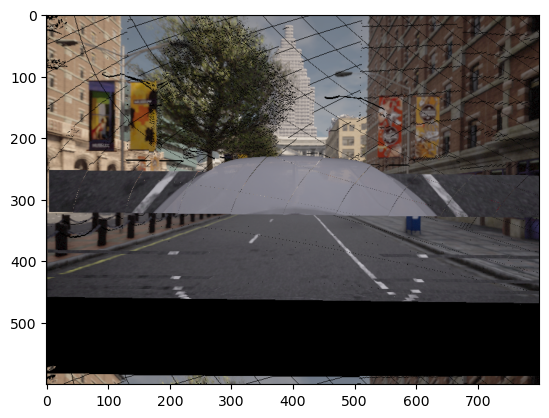

In [45]:
plt.imshow(color1_projected)

In [46]:
# import open3d as o3d
# pcd_o3d = o3d.geometry.PointCloud()  
# pcd_o3d.points = o3d.utility.Vector3dVector(point_1_inverseE_projected.T)  
# pcd_o3d.colors = o3d.utility.Vector3dVector(color.reshape(-1,3)/255)  
# o3d.visualization.draw_geometries([pcd_o3d])

In [47]:
point1.shape

(480000, 3)

In [48]:
#train for Tqr with known 2 extrinsic matrix

Tqr = torch.eye(4)
Tqr.requires_grad = True

optimizer = torch.optim.Adam([Tqr], lr=0.05)
for epoch in range(1000):
    # print("epoch:",epoch)
    loss = torch.sum((torch.tensor(extrinsic2,dtype=torch.float32,requires_grad=False)-Tqr@torch.tensor(extrinsic1,dtype=torch.float32,requires_grad=False))**2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [49]:
Tqr

tensor([[ 0.9717,  0.0716, -0.0111, -0.5780],
        [-0.0118,  0.9987,  0.0035,  0.0128],
        [ 0.0150, -0.0026,  0.9999, -0.0051],
        [ 0.0000,  0.0000,  0.0000,  1.0000]], requires_grad=True)

In [50]:
#plot projected im1 to im2

tempq2 = (Tqr.detach().cpu().numpy()@(np.concatenate([point1, np.ones((point1.shape[0], 1))], axis=1).T)).T
tempq2 = tempq2[:, :3]/tempq2[:, [-1]]
tempp2Image,tempp2Image_color= point_to_image(tempq2,intrinsic,height=im2.shape[0],width = im2.shape[1],color =color2)

(480000, 3)
image.shape (476690, 2)


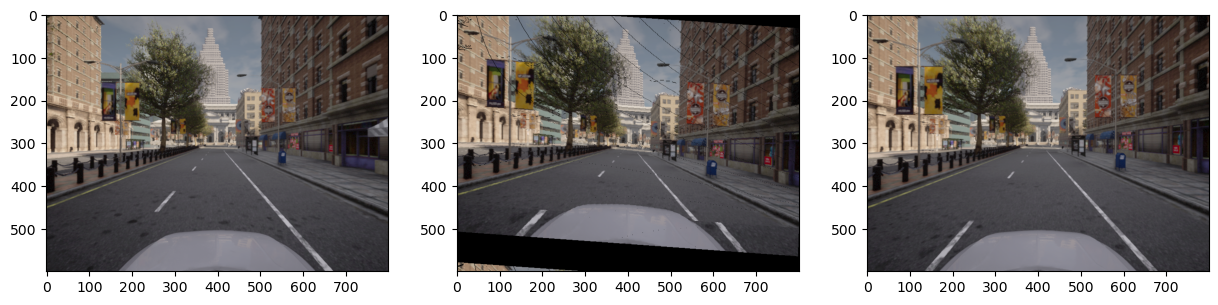

In [51]:
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[1].imshow(tempp2Image_color)
ax[2].imshow(im2)
ax[0].imshow(im1)

In [52]:
#train for Tqr with known extrinsic matrix of reference frame only
device = 'cuda'
Tqr = torch.eye(4).to(device)
Tqr.requires_grad = True
loss_list = []
optimizer = torch.optim.Adam([Tqr], lr=0.005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
for epoch in range(1000):
    # print("epoch:",epoch)
    extrinsic1_tensor = torch.tensor(extrinsic1,dtype=torch.float32,requires_grad=False).to(device)
    p1_tensor = torch.tensor(point1,dtype=torch.float32,requires_grad=False).to(device)
    p2_tensor = torch.tensor(point2,dtype=torch.float32,requires_grad=False).to(device)
    
    worldpoint_1 = inverse_E_point(p1_tensor,extrinsic1_tensor)
    worldpoint_2 = inverse_E_point(p2_tensor,Tqr@extrinsic1_tensor)
    loss = torch.sum((worldpoint_1-worldpoint_2)**2)
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()



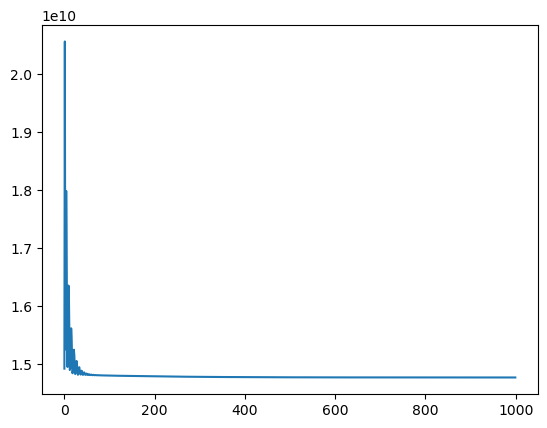

In [53]:
plt.plot(loss_list)

In [55]:
tempq3 = (Tqr.detach().cpu().numpy()@(np.concatenate([point1, np.ones((point1.shape[0], 1))], axis=1).T)).T
tempq3 = tempq3[:, :3]/tempq3[:, [-1]]

tempp3Image,tempp3Image_color= point_to_image(tempq3,intrinsic,height=im2.shape[0],width = im2.shape[1],color =color2)

fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[1].imshow(tempp3Image_color)
ax[2].imshow(im2)
ax[0].imshow(im1)

(480000, 3)


IndexError: index 423175 is out of bounds for axis 0 with size 422495

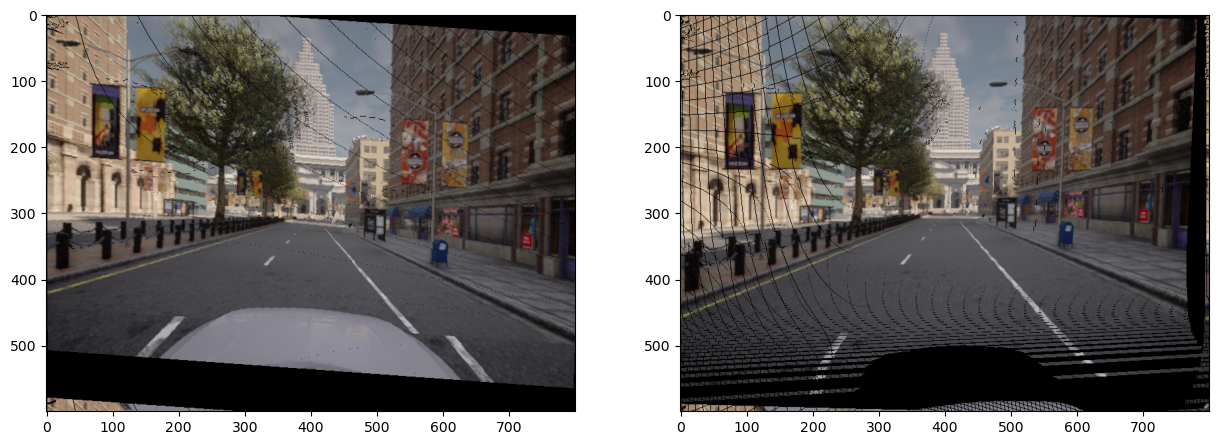

In [ ]:
fig2,ax2 = plt.subplots(1,2,figsize=(15,15))
ax2[0].imshow(tempp2Image_color)
ax2[1].imshow(tempp3Image_color)

In [64]:
#sanity check, project u to u', same image

imageC =im1
imagegt = im1
depthC = depth1
depthgt = depth1
intrinsicC = intrinsic
extrinsicC = extrinsic1
extrinsicgt = extrinsic1

pointC,colorC = image_to_point(imageC, intrinsicC, depthC)
# point_C_inverseE = inverse_E_point(pointC,extrinsicC)
# point_C_project = extrinsicgt@np.concatenate([point_C_inverseE, np.ones((point_C_inverseE.shape[0], 1))], axis=1).T
# point_C_project = point_C_project.T[:, :3]
# point_C_inverseE_projected,colorC_projected = point_to_image(point_C_project,intrinsicC,height=imageC.shape[0],width = imageC.shape[1],color =colorC)

# pointgt,colorgt = image_to_point(imagegt, intrinsicC, depthgt)


In [ ]:
pointC

array([[-0.41960784, -0.31470588,  0.41960784],
       [-0.41960784, -0.31365686,  0.41960784],
       [-0.41960784, -0.31260784,  0.41960784],
       ...,
       [ 0.00195098,  0.00487255,  0.00392157],
       [ 0.00195098,  0.00488235,  0.00392157],
       [ 0.00195098,  0.00489216,  0.00392157]])

In [ ]:
import open3d as o3d
pcd_o3d = o3d.geometry.PointCloud()  
pcd_o3d.points = o3d.utility.Vector3dVector(pointC)  
pcd_o3d.colors = o3d.utility.Vector3dVector(color1)  
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
point_C_project

array([[-0.41960784, -0.31470588,  0.41960784],
       [-0.41960784, -0.31365686,  0.41960784],
       [-0.41960784, -0.31260784,  0.41960784],
       ...,
       [ 0.00195098,  0.00487255,  0.00392157],
       [ 0.00195098,  0.00488235,  0.00392157],
       [ 0.00195098,  0.00489216,  0.00392157]])

In [ ]:
intrinsic

array([[400.,   0., 400.],
       [  0., 400., 300.],
       [  0.,   0.,   1.]])

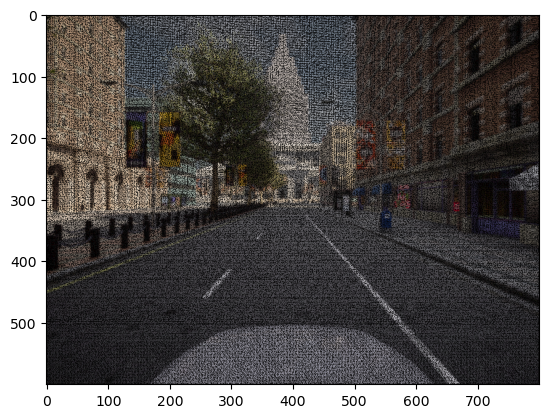

In [ ]:
plt.imshow(colorC_projected)
plt.imsave('colorC_projected.png',colorC_projected)

In [ ]:
#oivio
import os
print(os.getcwd())
im1 = cv2.cvtColor(cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\dataset\MN_015_HH_01\MN_015_HH_01\handheld0\cam0\data\1552660900894917888.png'), cv2.COLOR_BGR2RGB)

c:\Users\28340\Documents\UCL\finalYearProject\code


In [ ]:
def inverse_E_point(point,extrinsic):
    if type(point) != np.ndarray:

        temp_p = torch.concat([point,torch.ones(point.shape[0],1).to('cuda')],dim=1)
        inv_p = torch.inverse(extrinsic)@temp_p.T
        return inv_p[:3,:].T
        
    print(point.shape)
    
    temp_p = np.concatenate([point, np.ones((point.shape[0], 1))], axis=1)
    inv_point = np.linalg.inv(extrinsic)@temp_p.T
    return inv_point.T[:, :3]

Unit inverse

In [ ]:
# using single point to check 
# assume we have a point, and the depth. we project the point to plane, and recover the 3d point, see whether the 3d point could be restored. 

unit_point = np.array([[0,0,1],[0,1,2],[1,1,3],[1,0,4]])
#for every point, the x is row index, y is column index 
unit_depth = unit_point[:,[-1]].reshape(2,2,1)
# unit_color = np.array([[255,255,255]])
unit_intrinsic = np.array([[1,2,1],[0,2,1],[0,0,1]])
# project the point to image using camera intrinsic and extrinsic
unit_extrinsic = np.array([[2,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
unit_rotation = unit_extrinsic[:3,:3]
unit_translation = unit_extrinsic[:3,-1]
camera_points = (unit_rotation@unit_point.T).T + unit_translation
unit_depth_camera = camera_points[:,[-1]].reshape(2,2,1)
# print("unit_depth_camera\n",unit_depth_camera)
print("camera points:\n ",camera_points)
camera_points = camera_points/camera_points[:,[-1]]
#intrinsic , point in image plane
unit_image_points = (unit_intrinsic@camera_points.T).T[:,:2].reshape(2,2,-1)
print("image points:\n ",unit_image_points)


camera points:
  [[0 0 1]
 [0 1 2]
 [2 1 3]
 [2 0 4]]
image points:
  [[[1.         1.        ]
  [2.         2.        ]]

 [[2.33333333 1.66666667]
  [1.5        1.        ]]]


In [ ]:

#not sure whether depth 

#recover the 3d Point from unit_image_point
#inverse intrinsic 
height, width = unit_depth.shape[:2]
fx = unit_intrinsic[0,0]
fy = unit_intrinsic[1,1]
cx = unit_intrinsic[0,2]
cy = unit_intrinsic[1,2]
skew = unit_intrinsic[0,1]
# print("fx,fy,cx,cy,skew",fx,fy,cx,cy,skew)
unit_point_ = []

for i in range(unit_image_points.shape[0]):
    for j in range(unit_image_points.shape[1]):
        depth = unit_depth_camera[i,j]
        # print("depth",depth)
        y = ((unit_image_points[i,j][1] -cy)*depth)/fy
        x = ((unit_image_points[i,j][0] -cx)*depth -skew*y)/(fx)
        # print("y:",y)
        # print("deph: ",depth)
        unit_point_.append(np.array([x, y, depth]))
        
#inverse extrinsic
recovered_unit_point = inverse_E_point(np.array(unit_point_).reshape(-1,3),unit_extrinsic)
recovered_unit_point-unit_point #should be zero

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16, -2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
unit_point

array([[0, 0, 1],
       [0, 1, 2],
       [1, 1, 3],
       [1, 0, 4]])

In [ ]:
recovered_unit_point

array([[0., 0., 1.],
       [0., 1., 2.],
       [1., 1., 3.],
       [1., 0., 4.]])

Try different intrinsic 

In [60]:
from numpy.matlib import repmat

In [61]:
def depth_to_array(image):
    """
    Convert an image containing CARLA encoded depth-map to a 2D array containing
    the depth value of each pixel normalized between [0.0, 1.0].
    """
    # array = to_bgra_array(image)
    # array = array.astype(numpy.float32)
    # Apply (R + G * 256 + B * 256 * 256) / (256 * 256 * 256 - 1).
    normalized_depth = np.dot(image[:, :, :3], [65536.0, 256.0, 1.0])
    normalized_depth /= 16777215.0  # (256.0 * 256.0 * 256.0 - 1.0)
    return normalized_depth

In [62]:
# image = im1
# k = np.identity(3)
# k[0, 2] = image.shape[1] / 2.0
# k[1, 2] = image.shape[0] / 2.0
# # k[0, 0] = k[1, 1] = image.shape[0] / \
# #     (2.0 * math.tan(image.fov * math.pi / 360.0))
# #same intrinsic with carla intrinsic 
width = im1.shape[1]
height = im1.shape[0]

pixel_length = width * height
u_coord = repmat(np.r_[width-1:-1:-1],
                    height, 1).reshape(pixel_length)
print("u coord",u_coord.shape)
v_coord = repmat(np.c_[height-1:-1:-1],
                    1, width).reshape(pixel_length)
normalized_depth = depth_to_array(depth1)
# normalized_depth = np.reshape(normalized_depth, pixel_length)
max_depth = 0.9
max_depth_indexes = np.where(normalized_depth > max_depth)
normalized_depth = np.delete(normalized_depth, max_depth_indexes)
u_coord = np.delete(u_coord, max_depth_indexes)
v_coord = np.delete(v_coord, max_depth_indexes)
print("u_coord.shape",u_coord.shape)
color = im1.reshape(pixel_length, 3)
color = np.delete(color, max_depth_indexes, axis=0)

p2d = np.array([u_coord, v_coord, np.ones_like(u_coord)])
p3d = np.dot(np.linalg.inv(intrinsic), p2d)
p3d *= normalized_depth * 1000

u coord (480000,)
u_coord.shape (479494,)


In [ ]:
# color.shape[0]/3
p3d.shape

(3, 479494)

In [ ]:
im1.shape

(600, 800, 3)

In [63]:
import open3d as o3d
pcd_o3d = o3d.geometry.PointCloud()  
pcd_o3d.points = o3d.utility.Vector3dVector(p3d.T)  
pcd_o3d.colors = o3d.utility.Vector3dVector(color.reshape(-1,3)/255)  
o3d.visualization.draw_geometries([pcd_o3d])

In [ ]:
normalized_depth

array([[0.41960784, 0.41960784, 0.41960784, ..., 0.18431373, 0.18431373,
        0.18431373],
       [0.41960784, 0.41960784, 0.41960784, ..., 0.18431373, 0.18431373,
        0.18431373],
       [0.41960784, 0.41960784, 0.41960784, ..., 0.18431373, 0.18431373,
        0.18431373],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157]])

In [57]:
im1 = cv2.cvtColor(cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\002.png'), cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(cv2.imread(r'C:\Users\28340\Documents\UCL\finalYearProject\code\rgb_out\010.png'), cv2.COLOR_BGR2RGB)
intrinsic = rec['intrinsic']
extrinsic1 = rec['extrinsic'][1]
extrinsic2 = inv(np.array([[0,1,0,0],[0,0,-1,0],[1,0,0,0],[0,0,0,1]]))@rec['extrinsic'][9]
position1 = rec['position'][1]
position2 = rec['position'][9]
depth1 = rec['depth'][1]
depth2 = rec['depth'][9]
transfrom1 = rec['get_transfrom'][1]
transfrom2 = rec['get_transfrom'][9]

In [58]:
depth1.shape

(600, 800, 4)